In [3]:
import pl from "npm:nodejs-polars";
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";

let response = await fetch(
    "https://gist.githubusercontent.com/agustinustheo/195f32a4a6c68c493056c883d959ca35/raw/c7363d8b916ab00a2d1747adb89fca120da29f42/mock_financial_data.csv",
);

let data = await response.text();

let df = pl.readCSV(data, { sep: "," });

await display(df.sample(10));

In [4]:
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

// Sample data
const data = [
    { Date: "2022-01-01", NetIncome: 63 },
    { Date: "2022-01-02", NetIncome: 84 },
    { Date: "2022-01-03", NetIncome: 43 },
    // ... Add the rest of your data here
];

// Set the dimensions of the canvas
const width = 500;
const height = data.length * 40; // Height depends on the number of data points

// Create scales for the chart
const xScale = d3.scaleLinear()
                 .domain([0, d3.max(data, d => d.NetIncome)])
                 .range([0, width]);

const yScale = d3.scaleBand()
                 .domain(data.map(d => d.Date)) // Use date as the identifier
                 .range([0, height])
                 .padding(0.1);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Minimum width for inside label
const minInsideWidth = 40;

// Draw the bars and labels
data.forEach((record) => {
    const y = yScale(record.Date);
    const barWidth = xScale(record.NetIncome);
    const barHeight = yScale.bandwidth();

    // Draw bar
    ctx.fillStyle = "#8787A7";
    ctx.fillRect(0, y, barWidth, barHeight);

    // Decide where to place the label
    ctx.fillStyle = "#000";
    if (barWidth > minInsideWidth) {
        // Place label inside the bar
        ctx.fillText(`$${record.NetIncome}`, barWidth - 35, y + barHeight / 2 + 3);
    } else {
        // Place label outside the bar
        ctx.fillText(`$${record.NetIncome}`, barWidth + 5, y + barHeight / 2 + 3);
    }
});
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";

// Display the canvas (the method to do this depends on your Deno setup)
await display(canvas);


In [5]:
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

// Sample data
const data = [
    // Each group is an object with a date and expenses sub-object
    { date: "2022-01-01", expenses: { Salaries: 120, RnD: 80, Marketing: 60, Equipment: 40 } },
    { date: "2022-01-02", expenses: { Salaries: 350, RnD: 60, Marketing: 70, Equipment: 20 } },
    // ... other groups
];

// Set the dimensions of the canvas
const margin = { top: 20, right: 20, bottom: 30, left: 40 };
const width = 640 - margin.right;
const height = 480;

// Calculate the maximum sum of expenses for any group to set the relative scale
const maxExpense = d3.max(data, d => d3.sum(Object.values(d.expenses)));

// Create scales
const xScale = d3.scaleBand()
    .domain(data.map(d => d.date))
    .range([margin.left, width - margin.right])
    .padding(0.1);

const yScale = d3.scaleLinear()
    .domain([0, maxExpense])
    .range([height - margin.bottom, margin.top]);

// Define the stack generator
const stack = d3.stack()
    .keys(Object.keys(data[0].expenses))
    .value((d, key) => d.expenses[key]);

// Stack the data
const series = stack(data);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Define a function to draw text labels on the bars
function drawLabels(data, color, i) {
    data.forEach(d => {
        const y1 = yScale(d[1]);
        const y0 = yScale(d[0]);
        const barHeight = y0 - y1;
        const barCenter = y1 + barHeight / 2;

        // Set the label color to contrast with the bar color
        ctx.fillStyle = 'white';
        ctx.textAlign = 'center';
        ctx.textBaseline = 'middle';

        // Calculate the label to be displayed
        const label = d.data.expenses[Object.keys(data[0].data.expenses)[i]];
        const labelText = label > 0 ? `${Object.keys(data[0].data.expenses)[i]}: ${label}` : '';

        // Only draw the label if there is enough space in the bar segment
        if (ctx.measureText(labelText).width < xScale.bandwidth()) {
            ctx.fillText(labelText, xScale(d.data.date) + xScale.bandwidth() / 2, barCenter);
        }
    });
}

// Draw the series and labels
series.forEach((s, i) => {
    const color = d3.schemeCategory10[i % 10];
    s.forEach(d => {
        const y1 = yScale(d[1]);
        const y0 = yScale(d[0]);
        const barHeight = y0 - y1;
        ctx.fillStyle = color;
        ctx.fillRect(xScale(d.data.date), y1, xScale.bandwidth(), barHeight);
    });
    // Draw the labels
    drawLabels(s, color, i);
});

// Display the canvas
// The display logic will depend on your specific Deno environment
await display(canvas);

SyntaxError: Identifier 'data' has already been declared

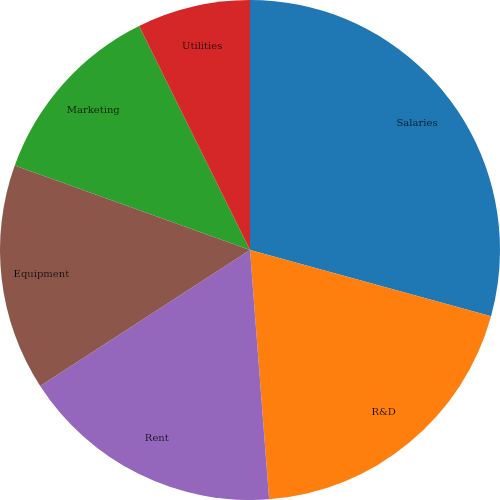

In [52]:
import * as d3 from "npm:d3";
import { createCanvas } from "https://deno.land/x/skia_canvas/mod.ts";

// Sample data
const data = [
    { category: "Salaries", amount: 120 },
    { category: "R&D", amount: 80 },
    { category: "Marketing", amount: 50 },
    { category: "Utilities", amount: 30 },
    { category: "Rent", amount: 70 },
    { category: "Equipment", amount: 60 }
];

// Set the dimensions of the canvas
const width = 500;
const height = 500;
const radius = Math.min(width, height) / 2;

// Create a pie function
const pie = d3.pie().value(d => d.amount);

// Create an arc generator for the slices
const arc = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

// Create an arc generator for the labels
const labelArc = d3.arc()
    .innerRadius(radius - 40) // Adjust to position the labels
    .outerRadius(radius - 40);

// Create the canvas
const canvas = createCanvas(width, height);
const ctx = canvas.getContext("2d");

// Translate to center the pie chart
ctx.translate(width / 2, height / 2);

// Draw the pie chart
pie(data).forEach((d, i) => {
    // Draw the slice
    ctx.beginPath();
    arc.context(ctx)(d);
    ctx.fillStyle = d3.schemeCategory10[i % 10];
    ctx.fill();

    // Draw the label
    ctx.fillStyle = "#000"; // Label color
    ctx.textAlign = "center";
    ctx.textBaseline = "middle";
    const centroid = labelArc.centroid(d);
    ctx.fillText(d.data.category, centroid[0], centroid[1]);
});

// Display the canvas
await display(canvas);
